In [1]:
import numpy as  np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df_cancer_train=pd.read_csv("data_breast cancer.csv")

In [3]:
df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
from sklearn import preprocessing


In [6]:
# Cleaning and modifying the data
data = df_cancer_train.drop('id',axis=1)
data = df_cancer_train.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = df_cancer_train['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

In [7]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
X.shape

(569, 30)

In [10]:
b_new=stats.zscore(X, axis=1)

In [11]:
b_new

array([[-0.3371657 , -2.89953798, -0.19744936, ...,  0.63189702,
         0.99926919,  0.34169718],
       [ 1.76561097, -0.6337524 ,  1.60751892, ...,  0.94942931,
        -0.51315777,  0.06384429],
       [ 1.0160869 , -0.61001312,  0.99671758, ...,  1.55890916,
         0.39726204, -0.97872624],
       ...,
       [ 0.80800798,  2.75033474,  0.76519569, ...,  0.39126329,
        -1.80457877, -0.66786155],
       [ 0.02779815,  0.58159868,  0.18809949, ...,  0.52993191,
         0.11756627,  0.45171726],
       [-1.02308426,  2.25347705, -1.02955831, ..., -0.95459614,
         0.88029589,  0.12006486]])

In [12]:
b_new.shape

(569, 30)

In [13]:
b_z=np.zeros((569,30))

for i in range(len(b_new)):
    for j in range(len(b_new[0])):
        if(b_new[i][j] > 0.05):
              b_z[i][j]=X[i][j]
                

In [15]:
y=data['diagnosis'].values

In [16]:
x_train,x_test,y_train,y_test=train_test_split(b_z,y,test_size=0.4)

In [17]:
cluster_num = 2


In [19]:
from sklearn.cluster import KMeans,MiniBatchKMeans


In [20]:
kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(x_train)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [21]:
print ("centroids : ")
print( centroids)
print ("labels : ")
print (labels)

centroids : 
[[ 1.02331398e+00  3.78702995e-01  1.08923191e+00  1.05595010e+00
   5.77055273e-01  1.14816709e+00  1.30191789e+00  1.26533541e+00
   7.58864466e-01  6.98865902e-01  1.01896635e+00  3.58839138e-01
   9.87365757e-01  9.06081154e-01  2.42962118e-01  8.09765652e-01
   7.17895705e-01  7.47236594e-01  5.24082912e-01  5.88070967e-01
   1.12819044e+00  4.83479204e-01  1.18416082e+00  1.10567084e+00
   4.72838935e-01  9.06733867e-01  1.12785351e+00  1.19329271e+00
   7.61419207e-01  7.73551723e-01]
 [ 4.13709089e-02  2.79242296e-01  3.23034555e-02 -4.84541605e-03
   1.93897474e-01  7.95123773e-02  3.57516139e-02  6.25529907e-02
   1.47209322e-01  1.55802653e-01  8.91365230e-04  3.08441727e-01
  -2.13580477e-02 -1.03449660e-01  3.26845381e-01  1.41281343e-01
   8.58984692e-02  1.63912548e-01  1.76493836e-01  9.71369305e-02
   1.55285100e-02  2.52903341e-01  5.93255145e-03 -3.70334561e-02
   1.85708791e-01  6.74900359e-02  6.61412432e-02  1.02994012e-01
   1.17874242e-01  9.5755348

In [22]:
color = ["g", "r"]

In [23]:
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *


coordinate: [ 0.30182423  0.          0.23400015  0.16186043  0.          0.
  0.         -0.57647347 -0.33084349  0.          0.          0.
  0.         -0.49761441  0.          0.         -0.54323526 -0.42841796
 -0.49306784  0.         -0.014328    0.         -0.08224503 -0.10808197
  0.         -0.51250624  0.         -0.49983168  0.          0.        ] label: 1
i :  0
color[labels[i]] :  r
coordinate: [ 0.          0.73310794  0.          0.         -0.04983582  0.
  0.          0.          0.79729802  0.38592713  0.          0.45385191
  0.          0.          0.          0.2812284   0.08475876  0.
  1.03857523  0.35105361  0.          0.42058917  0.          0.
  0.          0.          0.          0.          0.43396041 -0.20092763] label: 1
i :  1
color[labels[i]] :  r
coordinate: [0.         0.         0.         0.         1.58269942 2.56335845
 1.73887209 0.         0.         2.78309559 0.         0.
 0.         0.         0.         2.60958662 1.5098476  0.
 0.        

coordinate: [0.         0.         0.         0.         3.09140679 1.3675201
 1.48526167 1.21466066 0.         2.00199576 0.         0.
 0.         0.         0.         0.         0.75718318 0.
 0.         1.24940055 0.         0.         0.         0.
 2.35974766 0.99005577 1.75307035 1.27893942 0.         3.13399627] label: 0
i :  51
color[labels[i]] :  g
coordinate: [-0.17815976  0.         -0.25863464 -0.25224091  0.          0.
  0.          0.          0.          0.         -0.65244432 -0.96242494
 -0.67178586 -0.43886984  0.          0.          0.          0.
 -0.69526894 -0.84308588 -0.26903951  0.         -0.3509133  -0.31973466
  0.          0.          0.          0.          0.          0.        ] label: 1
i :  52
color[labels[i]] :  r
coordinate: [ 0.          0.          0.         -0.81935497  0.          0.
  0.          0.          0.         -0.76091455 -0.44527566 -0.82634915
 -0.52377171 -0.47957301 -0.29967179  0.          0.          0.
 -0.50517569 -0.427387

coordinate: [0.         0.         0.         0.         0.94221044 0.4464782
 0.11413328 0.09133273 0.35188293 0.         0.07156321 0.
 0.         0.         0.         0.07331932 0.         0.26340626
 0.         0.         0.         0.         0.         0.
 0.82549147 0.45760683 0.23369465 0.34707166 0.27056457 0.        ] label: 1
i :  112
color[labels[i]] :  r
coordinate: [-0.50761623  0.         -0.53666849 -0.53010974 -0.45049726  0.
  0.         -0.57905287 -0.44767367  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.55067175  0.         -0.59694432 -0.55494338
 -0.13889814 -0.29812716 -0.44659419 -0.1158169   0.33851135 -0.44475722] label: 1
i :  113
color[labels[i]] :  r
coordinate: [1.11410483 0.         1.16283917 0.         0.         2.08957147
 0.         1.52393051 1.24271312 0.         2.0768403  0.
 1.70535113 2.07834576 0.         1.83942876 0.         1.44429263
 0.         1.23275749 1.26751

  0.01014389  0.04284373  0.36178853 -0.2554448   0.17026217 -0.32838401] label: 1
i :  166
color[labels[i]] :  r
coordinate: [ 0.          0.33750653  0.          0.          0.          0.08640009
  0.24734152  0.          0.          0.          0.          0.
  0.          0.          0.08467713  0.35276701  0.47269592  0.12066176
  0.          0.          0.         -0.03537345  0.          0.
  0.11973362  0.64017892  0.85497394  0.05319833  0.          0.        ] label: 1
i :  167
color[labels[i]] :  r
coordinate: [ 0.         -0.04180541  0.          0.          0.          0.
  0.          0.          0.45410934 -0.21513699  0.          0.38672118
  0.          0.         -0.32567284  0.          0.          0.
  0.35690325  0.          0.          0.14212628  0.          0.
 -0.44136579  0.          0.          0.          0.94841464  0.        ] label: 1
i :  168
color[labels[i]] :  r
coordinate: [0.         0.49342003 0.         0.         0.         0.
 0.         0.     

coordinate: [1.16238725 0.         1.10105387 1.05832157 0.         0.
 0.30383889 0.78880201 0.         0.         0.         0.
 0.         0.1883989  0.         0.         0.         0.
 0.         0.         1.15361747 0.         1.00195948 1.0625121
 0.48357151 0.         0.54265516 0.95918088 0.         0.        ] label: 1
i :  215
color[labels[i]] :  r
coordinate: [2.15359679 0.         2.01547631 2.53441083 0.         0.
 0.         0.92164102 0.         0.         2.89396545 0.
 2.40928466 4.04309843 0.         0.         0.         0.
 0.         0.         2.99872281 0.         2.74740962 3.97713138
 0.         0.         0.         1.02617791 0.         0.        ] label: 0
i :  216
color[labels[i]] :  g
coordinate: [0.         0.         0.         0.         0.84257882 0.4938569
 0.         0.         0.81555274 0.31362933 0.         0.5318687
 0.         0.         0.25535072 0.77361525 0.63748633 1.12960587
 0.97561441 0.72627894 0.         0.         0.         0.
 0.

coordinate: [1.57704797 0.         1.56238411 1.53328671 0.         0.
 1.22411827 1.58325667 0.98714708 0.         0.         1.93617087
 1.1420063  0.         0.         0.         0.         1.01605911
 2.0604778  0.         1.34206257 1.46278943 1.49938299 1.1591973
 0.         0.         0.96531699 1.68853489 1.85113622 0.        ] label: 0
i :  264
color[labels[i]] :  g
coordinate: [-0.07307451  0.32819826 -0.09057863 -0.1993406  -0.04129597 -0.04815541
  0.          0.          0.          0.57872129  0.          0.
  0.          0.         -0.24766968 -0.21004065 -0.19044453  0.
  0.         -0.0741009  -0.25247291 -0.15099254 -0.24100355  0.
 -0.26163864  0.          0.          0.          0.          0.05398513] label: 1
i :  265
color[labels[i]] :  r
coordinate: [-0.06455408 -0.62124513 -0.12353079 -0.1578167   0.          0.
  0.          0.          0.00504331  0.          0.          0.
  0.         -0.57880072  0.          0.          0.          0.
  0.         -0.6429

 -0.26163864  0.          0.         -0.41973978 -0.15329395 -0.33946717] label: 1
i :  312
color[labels[i]] :  r
coordinate: [ 0.11437486  0.01171713  0.09395347  0.01368268  0.          0.
 -0.00790104  0.          0.          0.          0.          0.24883105
  0.          0.          0.         -0.27934368  0.06287512  0.
  0.          0.          0.00638025  0.44175886  0.02498398 -0.08804177
  0.          0.06765318  0.50715349 -0.28422307  0.          0.        ] label: 1
i :  313
color[labels[i]] :  r
coordinate: [ 0.          1.30323939  0.          0.          0.47251852  0.
  0.          0.          0.03059991  0.80837314  0.         -0.02332054
  0.          0.          0.42635765  0.          0.          0.78734348
  0.04815307 -0.04573205  0.          0.76256113  0.          0.
 -0.05560995  0.          0.          0.08517419  0.         -0.07956699] label: 1
i :  314
color[labels[i]] :  r
coordinate: [-0.18668019  0.         -0.19149462  0.          0.76429684  0.211479

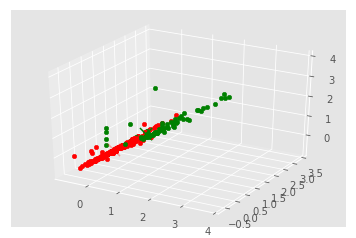

In [24]:
c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')


for i in range(len(x_train)):
    print("coordinate:",x_train[i], "label:", labels[i])
    print ("i : ",i)
    print ("color[labels[i]] : ",color[labels[i]])
    ax.scatter(x_train[i][0], x_train[i][1], x_train[i][2], c=color[labels[i]])


for cluster_number in range(cluster_num):
  print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, c=color)

plt.show()
